# Kmeans Cluster 

PB20061210 赖永凡

## experiment II

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Preprocessing

In [2]:
df.rename(columns = {'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Score'}, inplace=True)
df.drop(columns=['CustomerID'], inplace=True)
df.describe()

,Age,Income,Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Analysis which two features are suitable for clustering

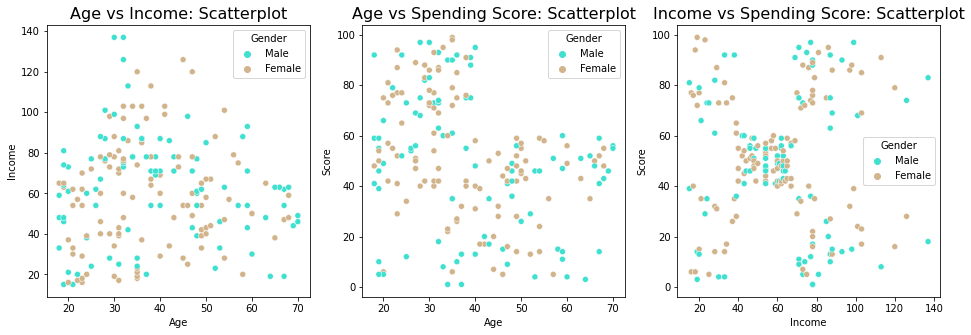

In [3]:
plt.subplots(figsize=(16,5))

plt.subplot(1,3,1)
plt.title('Age vs Income: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Age', y='Income', hue='Gender', palette=('#40E0D0', '#D2B48C'), alpha=1)

plt.subplot(1,3,2)
plt.title('Age vs Spending Score: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Age', y='Score', hue='Gender',  palette=('#40E0D0', '#D2B48C'), alpha=1)

plt.subplot(1,3,3)
plt.title('Income vs Spending Score: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Income', y='Score', hue='Gender',  palette=('#40E0D0', '#D2B48C'), alpha=1)

plt.show()

Choosing `Income` and `Score` for clustering

In [4]:
X = df[['Income','Score']].to_numpy()
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### K-means Cluster

In [5]:
class KmeansCluster():

    def __init__(self, num_cluster, max_iter = 10, random_state = 42):
        self.K = num_cluster
        self.max_iter = max_iter
        self.seed = random_state

        self.centroids = None
        self.cluster = None
        self.errors = None


    def initialize_centroids(self, X):
        np.random.seed(self.seed)
        centroids = np.zeros((self.K, X.shape[1]))
        for j in range(self.K):
            centroid = X[np.random.choice(range(X.shape[0]))]
            centroids[j] = centroid
            
        self.centroids = centroids
        return centroids


    def clustering(self, X):
        errors = list()
        n = X.shape[0]
        for i in range(n):
            error = [np.sum((X[i] - self.centroids[j])**2) for j in range(self.K)]
            errors.append(np.sqrt(error))
        cluster = np.argmin(errors, axis=1)
        self.cluster = cluster
        self.errors = np.min(errors, axis=1)
        return cluster


    def update_centroids(self, X):
        cluster = self.clustering(X)
        for j in range(self.K):
            new_centeroid = np.mean(X[np.where(cluster == j)], axis=0)
            self.centroids[j] = new_centeroid

        return self.centroids


    def plot_state(self, df, **kwargs):
        plt.figure(figsize=(5, 5))
        df['Cluster'] = self.cluster
        sns.scatterplot(df, x=kwargs['label'][0], y=kwargs['label'][1], hue='Cluster', palette="Set2")
        plt.scatter(x=self.centroids[:, 0], y=self.centroids[:, 1], c = 'red', label = 'Centroids')
        plt.show()
    
    
    def fit(self, X, plot=True, **kwargs):
        self.initialize_centroids(X)
        for _ in range(self.max_iter):
            self.update_centroids(X)

        self.clustering(X)
        if plot and X.shape[1] == 2:
            self.plot_state(df, **kwargs)

    def calculate_SSE(self):
        SSE = np.sum(np.square(self.errors))
        return SSE

    def calculate_SC(self, X):
        num = X.shape[0]
        A = np.zeros(num)
        B = np.zeros(num)
        for i in range(num):
            error = [np.sum((X[i] - self.centroids[j])**2) for j in range(self.K)]
            label = np.argsort(error)[0]
            nearest = np.argsort(error)[1]
            A[i] = np.sum((X[i] - X[np.where(self.cluster == label)])**2)
            B[i] = np.sum((X[i] - X[np.where(self.cluster == nearest)])**2)
        
        a = np.mean(A)
        b = np.mean(B)
        SC = (b - a) / max(a, b)
        return SC

    def predict(self, x):
        loss = [np.sum((x - self.centroids[j])**2) for j in range(self.K)]
        return np.argmin(loss)


Find the best `k`

In [6]:
SSE_list, SC_list = [], []
for k in range(2, 9):
    Cluster = KmeansCluster(k)
    Cluster.fit(X, label = ['Income', 'Score'], plot=False)
    SSE_list.append(Cluster.calculate_SSE())
    SC_list.append(Cluster.calculate_SC(X))

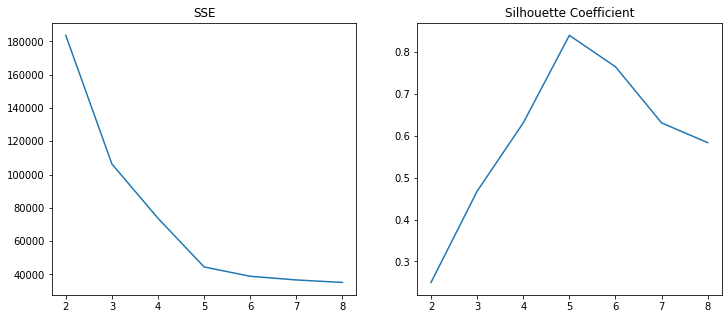

In [7]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 9), SSE_list)
plt.title('SSE')
plt.subplot(1, 2, 2)
plt.plot(range(2, 9), SC_list)
plt.title('Silhouette Coefficient')
plt.show()

Choosing `k = 5`

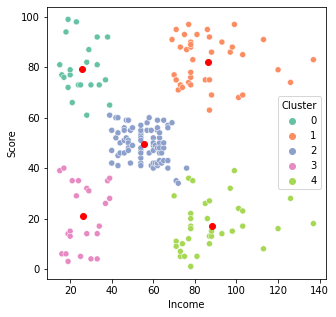

SSE : 44448.455 
SC : 0.840


In [8]:
Cluster_5 = KmeansCluster(5)
Cluster_5.fit(X, label = ['Income', 'Score'])
SSE = Cluster_5.calculate_SSE()
SC = Cluster_5.calculate_SC(X)
print('SSE : {:.3f} \nSC : {:.3f}'.format(SSE, SC))

### Trying other features

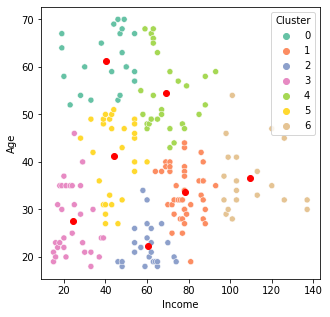

0.6635085416326617

In [9]:
X = df[['Income','Age']].to_numpy()
Cluster = KmeansCluster(7)
Cluster.fit(X, label = ['Income', 'Age'])
Cluster.calculate_SC(X)

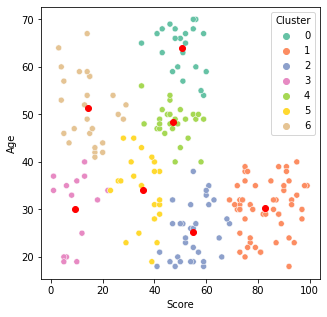

0.6368255834516825

In [10]:
X = df[['Score','Age']].to_numpy()
Cluster = KmeansCluster(7)
Cluster.fit(X, label = ['Score', 'Age'])
Cluster.calculate_SC(X)

Using all three features

In [11]:
X_3d = df.drop(columns = ['Gender', 'Cluster'])
Cluster = KmeansCluster(6)
Cluster.fit(X_3d.to_numpy(), plot=False)
Cluster.calculate_SC(X_3d.to_numpy())

0.7307609491178115

In [12]:
X_3d['Cluster'] = Cluster.cluster
X_3d = X_3d.to_numpy()

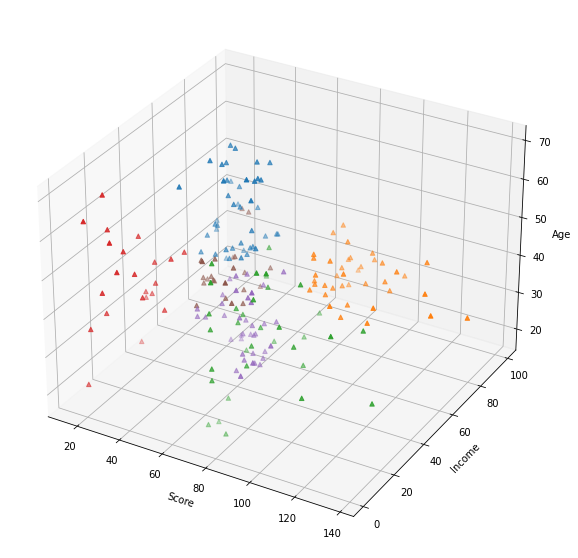

In [13]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ="3d")
for j in range(6):
    X_3dclutser = X_3d[np.where(Cluster.cluster == j)]
    ax.scatter(X_3dclutser[:,1], X_3dclutser[:,2], X_3dclutser[:,0], marker='^')

ax.set_xlabel('Score')
ax.set_ylabel('Income')
ax.set_zlabel('Age')
plt.show()

## Experiment III

Bernoulli distribution

In [14]:
def rand_noise(x, y):
    return [x + np.random.rand(), y + np.random.rand()]

Bern_0 = [rand_noise(0, 0) for _ in range(100)]
Bern_2 = [rand_noise(1, 1) for _ in range(100)]
Bern = Bern_0 + Bern_2
np.random.shuffle(Bern)
Bern = np.array(Bern)

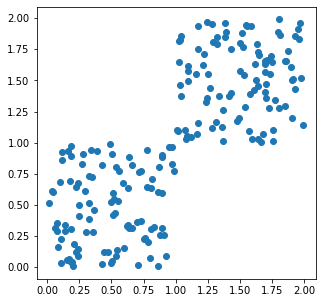

In [15]:
plt.figure(figsize=(5, 5))
plt.scatter(Bern[:, 0], Bern[:, 1])
plt.show()

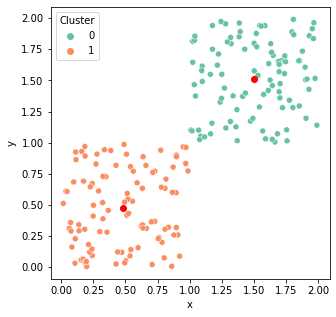

k = 2, SC : 0.860


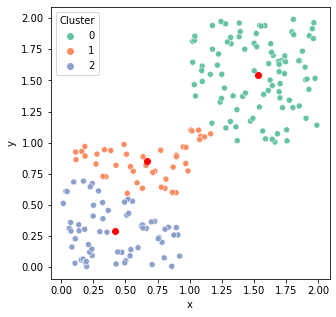

k = 3, SC : 0.570


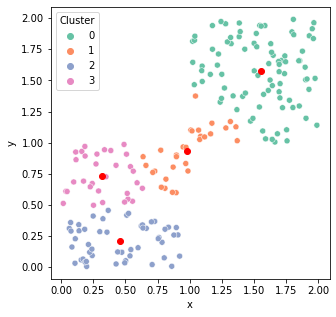

k = 4, SC : 0.360


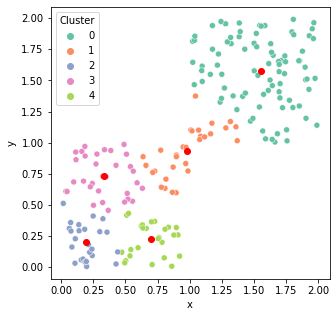

k = 5, SC : 0.362


In [16]:
df = pd.DataFrame(Bern, columns=['x', 'y'])
Cluster = KmeansCluster(2)
Cluster.fit(Bern, plot=True, label = ['x', 'y'])
print('k = 2, SC : {:.3f}'.format(Cluster.calculate_SC(Bern)))

df = pd.DataFrame(Bern, columns=['x', 'y'])
Cluster = KmeansCluster(3)
Cluster.fit(Bern, plot=True, label = ['x', 'y'])
print('k = 3, SC : {:.3f}'.format(Cluster.calculate_SC(Bern)))

df = pd.DataFrame(Bern, columns=['x', 'y'])
Cluster = KmeansCluster(4)
Cluster.fit(Bern, plot=True, label = ['x', 'y'])
print('k = 4, SC : {:.3f}'.format(Cluster.calculate_SC(Bern)))

df = pd.DataFrame(Bern, columns=['x', 'y'])
Cluster = KmeansCluster(5)
Cluster.fit(Bern, plot=True, label = ['x', 'y'])
print('k = 5, SC : {:.3f}'.format(Cluster.calculate_SC(Bern)))

Circular distribution

In [17]:
def circle_data(r):
    deg = np.random.randint(0, 360) * np.pi / 180
    x = r * np.cos(deg) + np.random.normal()
    y = r * np.sin(deg) + np.random.normal()
    return [x, y]

circle_0 = [circle_data(3) for _ in range(100)]
circle_1 = [circle_data(13) for _ in range(300)]
circle = circle_0 + circle_1
np.random.shuffle(circle)
circle = np.array(circle)

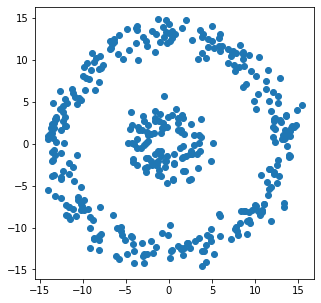

In [18]:
plt.figure(figsize=(5, 5))
plt.scatter(circle[:, 0], circle[:, 1])
plt.show()

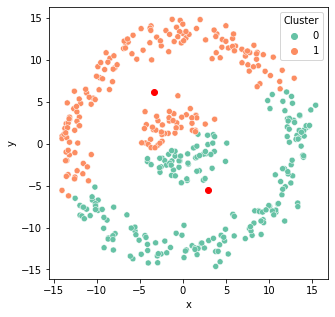

k = 2, SC : 0.499


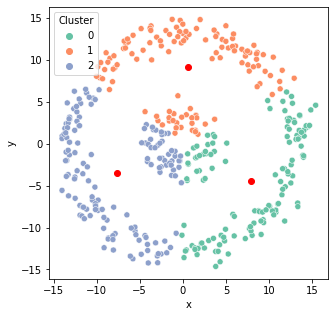

k = 3, SC : 0.596


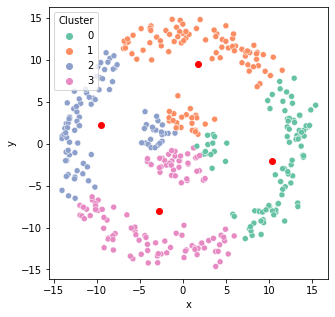

k = 4, SC : 0.577


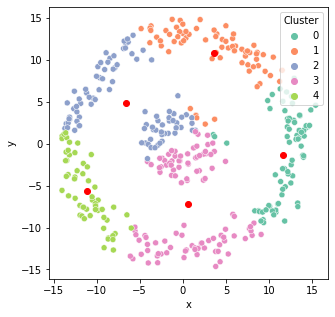

k = 5, SC : 0.545


In [19]:
df = pd.DataFrame(circle, columns=['x', 'y'])
Cluster = KmeansCluster(2)
Cluster.fit(circle, plot=True, label = ['x', 'y'])
print('k = 2, SC : {:.3f}'.format(Cluster.calculate_SC(circle)))

df = pd.DataFrame(circle, columns=['x', 'y'])
Cluster = KmeansCluster(3)
Cluster.fit(circle, plot=True, label = ['x', 'y'])
print('k = 3, SC : {:.3f}'.format(Cluster.calculate_SC(circle)))

df = pd.DataFrame(circle, columns=['x', 'y'])
Cluster = KmeansCluster(4)
Cluster.fit(circle, plot=True, label = ['x', 'y'])
print('k = 4, SC : {:.3f}'.format(Cluster.calculate_SC(circle)))

df = pd.DataFrame(circle, columns=['x', 'y'])
Cluster = KmeansCluster(5)
Cluster.fit(circle, plot=True, label = ['x', 'y'])
print('k = 5, SC : {:.3f}'.format(Cluster.calculate_SC(circle)))